In [508]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

import pickle5 as pk
import lzma
import mayavi.mlab as mlab
import mayavi
%gui qt
import os
from IPython.display import clear_output
from tvtk.util.ctf import PiecewiseFunction, ColorTransferFunction

fs2au = 41.341374575751
au2cm = 219474.63
pi = np.pi

hbar = 1.054571817E-34
elem = 1.602176634E-19
mass = 9.109383701528E-31
coul = 8.987551792314E9
perm = 8.854187812813E-12
bohr = 4*pi*perm*hbar**2/elem**2/mass
hart = hbar**2/mass/bohr**2

In [509]:
nstate = 400

In [510]:
E = []
states = []
dipx = np.zeros((nstate,nstate), dtype=np.complex128)
ex = []
dipy = np.zeros((nstate,nstate), dtype=np.complex128)
ey = []
dipz = np.zeros((nstate,nstate), dtype=np.complex128)
ez = []
SocH = [[]]

#  $SPNORB ---   CI   SPIN-ORBIT MATRIX ELEMENTS.
#  CI   ADIABATIC STATES---
#   CI   SPIN-MIXED STATES---
#  $SPNTRN MOMENT


f = open("Febpy_CI.dat", "r")

SPN_ROT_FLAG = False
SPN_ROT_IND = 1
SPN_ENS_FLAG = False
SPN_TRN_FLAG = False


for line in f.readlines():
    
    if line.strip() ==  "$SPNORB ---   CI   SPIN-ORBIT MATRIX ELEMENTS.":
        SPN_ROT_FLAG = True
        continue
        
    if SPN_ROT_FLAG:
        if line.strip() == "CI   ADIABATIC STATES---":
            SPN_ROT_FLAG = False
            continue
        l = line.replace(" ", "  ").replace("-", " -").replace("E -", "E-").split()
        if len(l) == 6:
            if int(l[0]) != SPN_ROT_IND % 100:
                SPN_ROT_IND += 1
                SocH.append([])
            SocH[-1].extend(l[1:])
        else:
            SocH[-1].extend(l)

        
        
    if line.strip() == "CI   SPIN-MIXED STATES---":
        SPN_ENS_FLAG = True
        continue
        
    if SPN_ENS_FLAG:
        if line.strip() == "$END":
            SPN_ENS_FLAG = False
            continue
        l = line.split()
        E.extend(l)
        
    if line.strip() == "$SPNTRN MOMENT":
        SPN_TRN_FLAG = True
        continue
        
    if SPN_TRN_FLAG:
        if line.strip() == "$END":
            SPN_TRN_FLAG = False
            continue
        l = line.replace("-", " -").replace("E -", "E-").split()
        dipx[int(l[0])-1,int(l[2])-1] = float(l[5]) + 1j*float(l[6])
        dipx[int(l[2])-1,int(l[0])-1] = float(l[5]) - 1j*float(l[6])
        dipy[int(l[0])-1,int(l[2])-1] = float(l[7]) + 1j*float(l[8])
        dipy[int(l[2])-1,int(l[0])-1] = float(l[7]) - 1j*float(l[8])
        dipz[int(l[0])-1,int(l[2])-1] = float(l[9]) + 1j*float(l[10])
        dipz[int(l[2])-1,int(l[0])-1] = float(l[9]) - 1j*float(l[10])

SocH = np.array(SocH, float)
SocH = (SocH[:,0::2] + 1j*SocH[:,1::2]) / au2cm

E = np.array(E, float) 
E /= au2cm
SocH -= np.diag([E[0]]*nstate)
E -= E[0]

H_0 = np.diag(E)

# Zero of energy set to spin mixed ground state
# Diag of SocH gives spin pure energies

U_s_ev, U_s = np.linalg.eigh(SocH)
min(np.isclose(U_s_ev, E))

# U_s of spin pure to mix transformation matrix

True

In [511]:
or0 = list(np.arange(0,nstate))
or1 = or0[0:100] + or0[100:175:3] + or0[101:175:3] + or0[102:175:3] + or0[175:250:3] + or0[176:250:3] + or0[177:250:3] + or0[250:325:3] + or0[251:325:3] + or0[252:325:3] + or0[325:400:3] + or0[326:400:3] + or0[327:400:3]
SocH_reordered = SocH[or1, :]
SocH_reordered = SocH_reordered[:, or1]

U_s_ev_re, U_s_re = np.linalg.eigh(SocH_reordered)


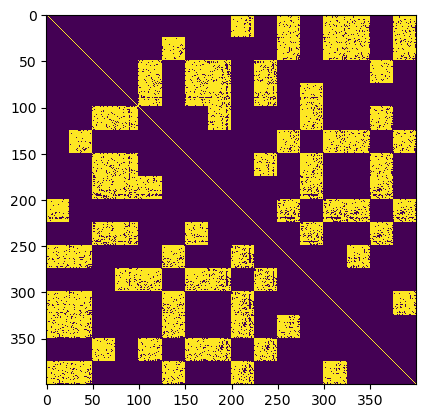

In [512]:
plt.imshow(np.sign(-.00001+np.abs((SocH_reordered))))

In [513]:
SocH_W = np.real((U_s.T)*np.conj(U_s.T))
SocH_W_re = np.real((U_s_re.T)*np.conj(U_s_re.T))

In [514]:
SM_state_makeup = []
for c in SocH_W_re:
    SM_state_makeup.append([sum(c[i:i+25]) for i in range(0, len(c), 25)])

(0, 12)

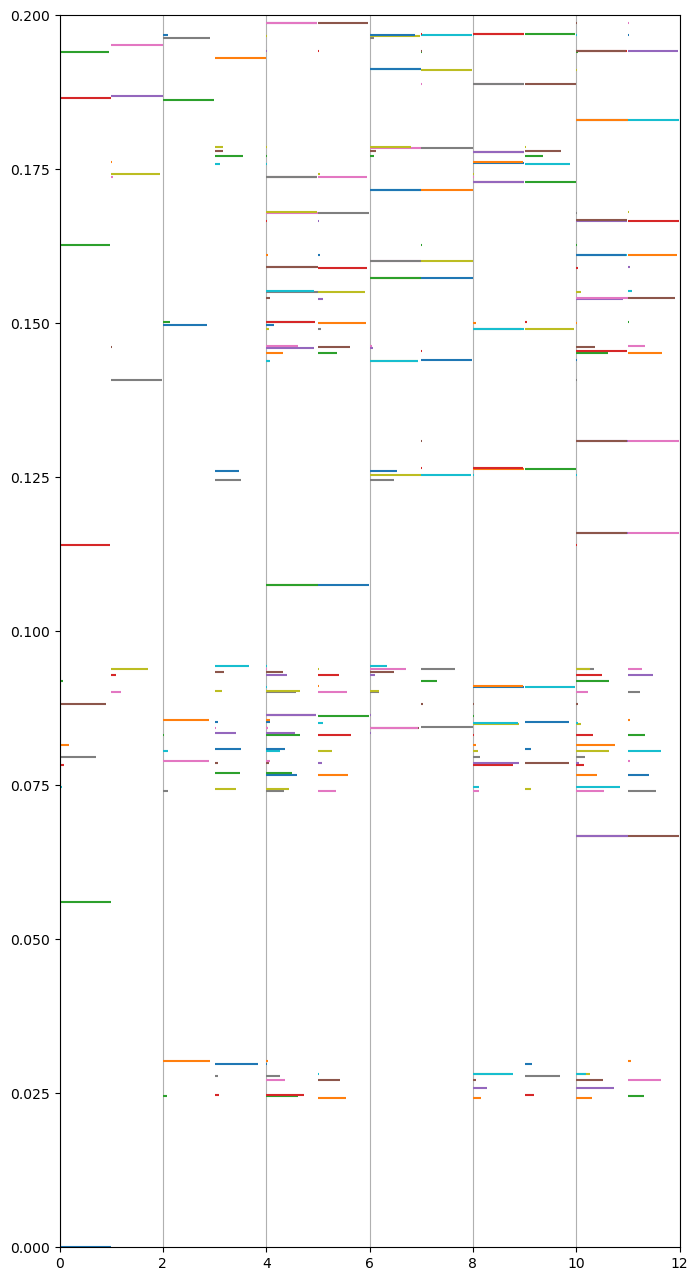

In [515]:
plt.figure(figsize=(8,16))
for i,sms in enumerate(SM_state_makeup):
    plt.hlines(E[i], 0, 0+sms[0], color="C"+str(i))
    plt.hlines(E[i], 1, 1+sms[1], color="C"+str(i))
    plt.hlines(E[i], 2, 2+sms[2], color="C"+str(i))
    plt.hlines(E[i], 3, 3+sms[3], color="C"+str(i))
    plt.hlines(E[i], 4, (4+2*sms[4]), color="C"+str(i))
    plt.hlines(E[i], 5, (5+sms[5]), color="C"+str(i))
    plt.hlines(E[i], 6, (6+2*sms[7]), color="C"+str(i))
    plt.hlines(E[i], 7, (7+sms[8]), color="C"+str(i))
    plt.hlines(E[i], 8, (8+2*sms[10]), color="C"+str(i))
    plt.hlines(E[i], 9, (9+sms[11]), color="C"+str(i))
    plt.hlines(E[i], 10, (10+2*sms[13]), color="C"+str(i))
    plt.hlines(E[i], 11, (11+sms[14]), color="C"+str(i))
plt.grid(axis='x')
plt.ylim(0, .20)
plt.xlim(0,12)

In [516]:
coords = [
 [ 0.000000  ,   0.000000  ,   1.067746],
 [-0.000000  ,  -1.264707  ,  -0.409742],
 [ 0.000000  ,   1.264707  ,  -0.409742],
 [-0.000000  ,  -0.724671  ,  -1.664414],
 [ 0.000000  ,   0.724671  ,  -1.664414],
 [-0.000000  ,  -2.612048  ,  -0.307324],
 [ 0.000000  ,   2.612048  ,  -0.307324],
 [-0.000000  ,  -3.448780  ,  -1.406501],
 [ 0.000000  ,   3.448780  ,  -1.406501],
 [-0.000000  ,  -1.522307  ,  -2.812129],
 [ 0.000000  ,   1.522307  ,  -2.812129],
 [-0.000000  ,  -2.900360  ,  -2.694111],
 [ 0.000000  ,   2.900360  ,  -2.694111],
 [-0.000000  ,  -1.407956  ,   2.389421],
 [ 0.000000  ,   1.407956  ,   2.389421],
 [-0.000000  ,  -2.334790  ,   3.104529],
 [ 0.000000  ,   2.334790  ,   3.104529],
 [-1.961435  ,   0.000000  ,   1.124970],
 [ 1.961435  ,   0.000000  ,   1.124970],
 [-3.128701  ,   0.000000  ,   1.052766],
 [ 3.128701  ,   0.000000  ,   1.052766],
 [-0.000000  ,  -2.983730  ,   0.710460],
 [ 0.000000  ,   2.983730  ,   0.710460],
 [-0.000000  ,  -4.521787  ,  -1.251756],
 [ 0.000000  ,   4.521787  ,  -1.251756],
 [-0.000000  ,  -1.053286  ,  -3.788927],
 [ 0.000000  ,   1.053286  ,  -3.788927],
 [-0.000000  ,  -3.533235  ,  -3.575317],
 [ 0.000000  ,   3.533235  ,  -3.575317]
]
charges = np.array([
  26,
  7,
  7,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  6,
  6,
  7,
  7,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1], dtype=float)

coords = np.array(coords)/0.529177210903

coords = np.c_[coords, charges]

bonds = []
for i1,atom1 in enumerate(coords[:,:-1]):
    for i2,atom2 in enumerate(coords[1+i1:,:-1]):
        i2+=i1+1

        if np.linalg.norm(atom1-atom2) < 3.75:
            bonds.append((i1,i2))
print(bonds)

[(0, 1), (0, 2), (0, 13), (0, 14), (0, 17), (0, 18), (1, 3), (1, 5), (2, 4), (2, 6), (3, 4), (3, 9), (4, 10), (5, 7), (5, 21), (6, 8), (6, 22), (7, 11), (7, 23), (8, 12), (8, 24), (9, 11), (9, 25), (10, 12), (10, 26), (11, 27), (12, 28), (13, 15), (14, 16), (17, 19), (18, 20)]


In [517]:
vw = (-42.537585270415676,
 89.7402743118783,
 31.046066152956463,
 np.array([ 0.03573193, -0.57389574, -0.22883734]))

mlab.points3d(coords[:,0], coords[:,1], coords[:,2], np.sqrt(coords[:,3])*0)
for pair in bonds:
    plotpair = np.vstack((coords[pair[0]], coords[pair[1]]))
    mlab.plot3d(plotpair[:,0], plotpair[:,1], plotpair[:,2], tube_radius=.1)

In [518]:
vw = (-42.537585270415676,
 89.7402743118783,
 31.046066152956463,
 np.array([ 0.03573193, -0.57389574, -0.22883734]))

In [519]:
with open('rho.pk','rb') as infile:
    rho = pk.load(infile)
    
with open('rho_a.pk','rb') as infile:
    rho_a = pk.load(infile)
    
with open('rho_b.pk','rb') as infile:
    rho_b = pk.load(infile)
    
with open('j.pk','rb') as infile:
    J = pk.load(infile)
    
with open('j_a.pk','rb') as infile:
    J_a = pk.load(infile)
    
with open('j_b.pk','rb') as infile:
    J_b = pk.load(infile)

with open('grid.pk','rb') as infile:
    grid = pk.load(infile)
    
C = np.load("nstate.npy")

# SoI = [0, 3, 4, 7, 8, 10, 12, 18, 19, 22, 25, 27, 30, 31, 34, 38, 40, 45, 48, 50, 52, 55, 57, 59, 63]
SoI = [0, 3, 4, 7, 8, 10, 12, 18, 19, 22, 25, 27, 30, 31, 34, 38, 40, 45, 48, 50, 52, 53, 54, 55, 57, 59, 63]
    
X, Y, Z = np.meshgrid(grid[0], grid[1], grid[2], indexing='ij')

In [520]:
state = 0

c_r = np.real(U_s[:,state])
c_i = np.imag(U_s[:,state])

# TODO rewrite for new format

rho_0 = 0.*rho["0,0"]
for i in SoI:
    c = c_r[i]**2 + c_i[i]**2
    rho_0 += c*rho[str(i)+","+str(i)]
    for j in [x for x in SoI if x > i]:
        c = c_r[i]*c_r[j] + c_i[i]*c_i[j]
        if c <= .0001: continue
        rho_0 += 2*c*rho[str(i)+","+str(j)]

In [521]:
np.shape(C)

(6976, 400)

In [571]:
f = mlab.figure(size=(1920,1080))

mlab.points3d(coords[:,0], coords[:,1], coords[:,2], coords[:,3]*0)
for pair in bonds:
    plotpair = np.vstack((coords[pair[0]], coords[pair[1]]))
    mlab.plot3d(plotpair[:,0], plotpair[:,1], plotpair[:,2], tube_radius=0.1)

c_r = np.real(C[6300,:])
c_i = np.imag(C[6300,:])

rho_t = -0*rho_0
for i in SoI:
    c = c_r[i]**2 + c_i[i]**2

    rho_t += c*(rho_a[str(i)+","+str(i)]+0*rho_b[str(i)+","+str(i)])
    for j in [x for x in SoI if x > i]:
        c = c_r[i]*c_r[j] - c_i[i]*c_i[j]
        if c <= .0001: continue
        rho_t += 2*c*(rho_a[str(i)+","+str(j)]+0*rho_b[str(i)+","+str(j)])
        
J_t = -0*J_a["0,3"]
for i in SoI:
    for j in [x for x in SoI if x > i]:
        c = c_r[i]*c_r[j] - c_i[i]*c_i[j] # might be wrong
        if c <= .0001: continue
        J_t += 2*c*(J_a[str(i)+","+str(j)]+0*J_b[str(i)+","+str(j)])

source = mlab.pipeline.scalar_field(X,Y,Z,rho_t-rho_a["0,0"])

vol = mlab.pipeline.volume(source, vmin=-.0012, vmax=.0012)

ctf = ColorTransferFunction()
# ctf.range = [-.0001,.0001]
# vol._ctf = ctf
# vol.update_ctf = True

otf = PiecewiseFunction()
# otf.add_point(0-.1,0)

otf.add_point(0-0.0015,0)
otf.add_point(0-0.0010,1)
otf.add_point(0-0.0005,0.0)
# otf.add_point(0-0.00005,0)

# otf.add_point(0+0.00005,0)
otf.add_point(0+0.0005,0.0)
otf.add_point(0+0.0010,1)
otf.add_point(0+0.0015,0)

# otf.add_point(0+.1,0)
vol._otf = otf
vol._volume_property.set_scalar_opacity(otf)

#     J_t[0] += (rho_t+rho['0,0'])*Ax[t_i]
#     J_t[1] += (rho_t+rho['0,0'])*Ay[t_i]
#     J_t[2] += (rho_t+rho['0,0'])*Az[t_i]

jnorm = np.sqrt(J_t[0]**2+J_t[1]**2+J_t[2]**2)
jnorm[ jnorm < 1E-6 ] = 0
jnorm[ jnorm > 1E-3 ] = 1E-3
print(jnorm.max())
print(jnorm.min())

qui = mlab.quiver3d(X,Y,Z,J_t[0],J_t[1],J_t[2], scalars=jnorm,
               scale_mode="scalar", transparent=True, mask_points=1, vmin=1E-6)

vw = (-42.537585270415676,
 89.7402743118783,
 31.046066152956463,
 np.array([ 0.03573193, -0.57389574, -0.22883734]))

mlab.view(vw[0], vw[1], vw[2], vw[3], roll=0)


0.001
0.0


(-42.537585270415676,
 89.7402743118783,
 31.046066152956463,
 array([ 0.        ,  0.        , -0.64666247]))

In [486]:
f = mlab.figure(size=(1920,1080), figure="J")

mlab.points3d(coords[:,0], coords[:,1], coords[:,2], coords[:,3]*0)
for pair in bonds:
    plotpair = np.vstack((coords[pair[0]], coords[pair[1]]))
    mlab.plot3d(plotpair[:,0], plotpair[:,1], plotpair[:,2], tube_radius=0.1)

source = mlab.pipeline.scalar_field(X,Y,Z,rho_b["52,52"]-rho_b["0,0"])

J_t = J["10,52"]
jnorm = np.sqrt(J_t[0]**2+J_t[1]**2+J_t[2]**2)
jnorm[ jnorm > 1E-8 ] = 0
jnorm[ jnorm < 1E-4 ] = 0

qui = mlab.quiver3d(X,Y,Z,J_t[0],J_t[1],J_t[2], scalars=jnorm,
               scale_mode="scalar", transparent=True, mask_points=1)

# vol = mlab.pipeline.volume(source, vmin=-.0012, vmax=.0012)

ctf = ColorTransferFunction()
# ctf.range = [-.0001,.0001]
# vol._ctf = ctf
# vol.update_ctf = True

otf = PiecewiseFunction()
# otf.add_point(0-.1,0)

otf.add_point(0-0.0015,0)
otf.add_point(0-0.0010,1)
otf.add_point(0-0.0005,0.0)
# otf.add_point(0-0.00005,0)

# otf.add_point(0+0.00005,0)
otf.add_point(0+0.0005,0.0)
otf.add_point(0+0.0010,1)
otf.add_point(0+0.0015,0)

# otf.add_point(0+.1,0)
vol._otf = otf
vol._volume_property.set_scalar_opacity(otf)

vw = (-42.537585270415676,
 89.7402743118783,
 31.046066152956463,
 np.array([ 0.03573193, -0.57389574, -0.22883734]))

mlab.view(vw[0], vw[1], vw[2], vw[3], roll=0)

0.0


(-42.537585270415676,
 89.7402743118783,
 31.046066152956463,
 array([ 0.        ,  0.        , -0.64666247]))

In [505]:
J_t = J["0,10"]
jnorm = np.sqrt(J_t[0]**2+J_t[1]**2+J_t[2]**2)
print(jnorm.max())

6.616663005197753e-17


In [396]:
with lzma.open('../L4_Small_Final_Par/rho.pk.lzma','rb') as infile:
    rhocn = pk.load(infile)
    
with lzma.open('../L4_Small_Final_Par/j.pk.lzma','rb') as infile:
    Jcn = pk.load(infile)
    
X, Y, Z = np.meshgrid(grid[0], grid[1], grid[2], indexing='ij')

FileNotFoundError: [Errno 2] No such file or directory: '../L4_Small_Final_Par/rho.pk.lzma'

In [28]:
statecn = 0

c_r = np.real(U_scn[:,statecn])
c_i = np.imag(U_scn[:,statecn])

rho_0cn = 0.*rhocn["0,0"]
for i in range(nstate):
    c = c_r[i]**2 + c_i[i]**2
    rho_0cn += c*rhocn[str(i)+","+str(i)]
    for j in [x+i+1 for x in range(nstate-i-1)]:
        c = c_r[i]*c_r[j] + c_i[i]*c_i[j]
        if c <= .0001: continue
        rho_0cn += 2*c*rhocn[str(i)+","+str(j)]

In [ ]:
f = mlab.figure(size=(1080,720))

statecn = 1
state = 1

c_r = np.real(U_scn[:,statecn])
c_i = np.imag(U_scn[:,statecn])

rho_tcn = 0*rho["0,0"]
for i in range(nstate):
    c = c_r[i]**2 + c_i[i]**2
    if c <= 0.0001: continue
    rho_tcn += c*rhocn[str(i)+","+str(i)]
    for j in [x+i+1 for x in range(nstate-i-1)]:
        c = c_r[i]*c_r[j] + c_i[i]*c_i[j]
        if c <= 0.0001: continue
        rho_tcn += 2*c*rhocn[str(i)+","+str(j)]
        
c_r = np.real(U_s[:,state])
c_i = np.imag(U_s[:,state])

rho_t = 0*rho["0,0"]
for i in range(nstate):
#     print(i)
    c = c_r[i]**2 + c_i[i]**2
    if c <= 0.0001: continue
    rho_t += c*rho[str(i)+","+str(i)]
    for j in [x+i+1 for x in range(nstate-i-1)]:
        c = c_r[i]*c_r[j] + c_i[i]*c_i[j]
        if c <= 0.0001: continue
        rho_t += 2*c*rho[str(i)+","+str(j)]
        
# source = mlab.pipeline.scalar_field(X,Y,Z,(rho_tcn-rho_t).astype("float32"))

source = mlab.pipeline.scalar_field(X,Y,Z,(rho_tcn+rho_t).astype("float32"))

vol = mlab.pipeline.volume(source, vmin=-.03, vmax=.03)

ctf = ColorTransferFunction()
# ctf.range = [-.0001,.0001]
# vol._ctf = ctf
# vol.update_ctf = True

otf = PiecewiseFunction()
# otf.add_point(0-.1,0)

otf.add_point(0-0.05,0)
otf.add_point(0-0.025,1)
otf.add_point(0-0.01,0.01)
otf.add_point(0-0.005,0)

otf.add_point(0+0.005,0)
otf.add_point(0+0.01,0.01)
otf.add_point(0+0.025,1)
otf.add_point(0+0.05,0)

# otf.add_point(0+.1,0)
vol._otf = otf
vol._volume_property.set_scalar_opacity(otf)

#     J_t[0] += (rho_t+rho['0,0'])*Ax[t_i]
#     J_t[1] += (rho_t+rho['0,0'])*Ay[t_i]
#     J_t[2] += (rho_t+rho['0,0'])*Az[t_i]

# jnorm = sqrt(J_t[0]**2+J_t[1]**2+J_t[2]**2)
# jnorm[ jnorm < 2E-4 ] = 0

# qui = quiver3d(X,Y,Z,J_t[0],J_t[1],J_t[2], scalars=jnorm,
#                scale_mode="scalar", transparent=True)

mlab.view(vw[0], vw[1], vw[2], vw[3], roll=0)


In [256]:
(U_s[337:340,54])

array([-5.30005560e-12+1.87363203e-13j,  2.02177880e-05-6.99476369e-01j,
       -5.30005266e-12+1.79895104e-13j])